In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
cameras_file = os.path.join("../Desktop/Archive", "red-light-camera-locations.csv")
speedings_file = os.path.join("../Desktop/Archive","speed-camera-violations.csv")

In [3]:
red_locs_df = pd.read_csv(cameras_file)
del red_locs_df["Third Approach"]
red_locs_df

,Intersection,First Approach,Second Approach,Date,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,15,24
1,Central-Addison,SB,EB,2010-11-15T00:00:00.000,41.945877,-87.766754,"{'latitude': '41.945877', 'human_address': '{""...",25,22254,15,361,44
2,Western-63rd,NB,EB,2007-11-12T00:00:00.000,41.779214,-87.683638,"{'latitude': '41.779214', 'human_address': '{""...",44,22257,64,370,2
3,Halsted-79th,NB,EB,2008-04-30T00:00:00.000,41.750643,-87.644043,"{'latitude': '41.750643', 'human_address': '{""...",17,21554,70,556,31
4,Wacker-Lake,NB,SB,2018-02-19T00:00:00.000,41.885700,-87.637000,"{'latitude': '41.8857', 'human_address': '{""ad...",22,14914,38,92,36
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Western-35th,SB,NB,2004-10-11T00:00:00.000,41.830280,-87.685033,"{'latitude': '41.83028', 'human_address': '{""a...",29,14924,56,2,1
145,Halsted-119th,SB,WB,2004-11-02T00:00:00.000,41.677815,-87.641907,"{'latitude': '41.677815', 'human_address': '{""...",45,21861,50,255,22
146,Cicero-Addison,NB,SB,2008-11-30T00:00:00.000,41.946124,-87.747064,"{'latitude': '41.946124', 'human_address': '{""...",27,22618,15,115,21
147,Harlem-Addison,NB,EB,2009-06-21T00:00:00.000,41.945264,-87.807006,"{'latitude': '41.945264', 'human_address': '{""...",39,22254,17,458,19


In [17]:
red_locs_df.dropna(how="any")
red_locs_df

,Intersection,First Approach,Second Approach,Date,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,15,24
1,Central-Addison,SB,EB,2010-11-15T00:00:00.000,41.945877,-87.766754,"{'latitude': '41.945877', 'human_address': '{""...",25,22254,15,361,44
2,Western-63rd,NB,EB,2007-11-12T00:00:00.000,41.779214,-87.683638,"{'latitude': '41.779214', 'human_address': '{""...",44,22257,64,370,2
3,Halsted-79th,NB,EB,2008-04-30T00:00:00.000,41.750643,-87.644043,"{'latitude': '41.750643', 'human_address': '{""...",17,21554,70,556,31
4,Wacker-Lake,NB,SB,2018-02-19T00:00:00.000,41.885700,-87.637000,"{'latitude': '41.8857', 'human_address': '{""ad...",22,14914,38,92,36
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Western-35th,SB,NB,2004-10-11T00:00:00.000,41.830280,-87.685033,"{'latitude': '41.83028', 'human_address': '{""a...",29,14924,56,2,1
145,Halsted-119th,SB,WB,2004-11-02T00:00:00.000,41.677815,-87.641907,"{'latitude': '41.677815', 'human_address': '{""...",45,21861,50,255,22
146,Cicero-Addison,NB,SB,2008-11-30T00:00:00.000,41.946124,-87.747064,"{'latitude': '41.946124', 'human_address': '{""...",27,22618,15,115,21
147,Harlem-Addison,NB,EB,2009-06-21T00:00:00.000,41.945264,-87.807006,"{'latitude': '41.945264', 'human_address': '{""...",39,22254,17,458,19


In [18]:
speedings_df = pd.read_csv(speedings_file)
speedings_df.dropna(how="any")
speedings_df

,Address,Camera ID,Date,Violations,X coordinate,Y coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,2019-11-21T00:00:00.000,87,1203645.368,1837056.145,41.707577,-87.529848,"{'latitude': '41.70757690291348', 'human_addre...",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,2019-11-21T00:00:00.001,7,1149841.166,1894930.809,41.867603,-87.725383,"{'latitude': '41.86760272243294', 'human_addre...",36.0,21572.0,30.0,98.0,14.0
2,1111 N HUMBOLDT,CHI010,2019-11-21T00:00:00.002,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11144 S VINCENNES,CHI023,2019-11-21T00:00:00.003,6,1166993.613,1830711.217,41.691025,-87.664248,"{'latitude': '41.69102545584918', 'human_addre...",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,2019-11-21T00:00:00.004,4,1167028.753,1830593.601,41.690702,-87.664122,"{'latitude': '41.690701951255015', 'human_addr...",45.0,22212.0,74.0,378.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207711,7518 S VINCENNES,CHI063,2014-07-01T00:00:00.000,124,1175649.435,1855003.192,41.757497,-87.631833,"{'latitude': '41.75749703994495', 'human_addre...",17.0,21554.0,67.0,495.0,32.0
207712,7738 S WESTERN,CHI065,2014-07-01T00:00:00.000,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207713,7739 S WESTERN,CHI064,2014-07-01T00:00:00.000,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207714,7826 S PULASKI,CHI072,2014-07-01T00:00:00.000,27,1151040.680,1852282.476,41.750546,-87.722093,"{'latitude': '41.75054619772355', 'human_addre...",23.0,4300.0,69.0,571.0,30.0


In [22]:
merged_df = pd.merge(red_locs_df, speedings_df, how="inner", on="Wards", suffixes=("_red", "_speeding"))
merged_df.dropna(how="any")

,Intersection,First Approach,Second Approach,Date_red,Latitude_red,Longitude_red,Location_red,Historical Wards 2003-2015_red,Zip Codes_red,Community Areas_red,...,Violations,X coordinate,Y coordinate,Latitude_speeding,Longitude_speeding,Location_speeding,Historical Wards 2003-2015_speeding,Zip Codes_speeding,Community Areas_speeding,Census Tracts_speeding
0,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,...,1,1155157.925,1934429.028,41.975884,-87.704801,"{'latitude': '41.9758840401294', 'human_addres...",46.0,21849.0,13.0,167.0
1,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,...,26,1154183.287,1939668.835,41.990282,-87.708245,"{'latitude': '41.9902819135942', 'human_addres...",46.0,4450.0,20.0,65.0
2,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,...,14,1155157.925,1934429.028,41.975884,-87.704801,"{'latitude': '41.9758840401294', 'human_addres...",46.0,21849.0,13.0,167.0
3,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,...,52,1154183.287,1939668.835,41.990282,-87.708245,"{'latitude': '41.9902819135942', 'human_addres...",46.0,4450.0,20.0,65.0
4,California-Peterson,NB,EB,2009-06-29T00:00:00.000,41.990442,-87.699401,"{'latitude': '41.990442', 'human_address': '{""...",46,4450,20,...,11,1155157.925,1934429.028,41.975884,-87.704801,"{'latitude': '41.9758840401294', 'human_addres...",46.0,21849.0,13.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688979,Pulaski-55th,SB,WB,2004-11-19T00:00:00.000,41.793205,-87.723160,"{'latitude': '41.793205', 'human_address': '{""...",35,22248,60,...,15,1150589.458,1868170.607,41.794155,-87.723333,"{'latitude': '41.7941545839503', 'human_addres...",35.0,22248.0,60.0,793.0
688980,Pulaski-55th,SB,WB,2004-11-19T00:00:00.000,41.793205,-87.723160,"{'latitude': '41.793205', 'human_address': '{""...",35,22248,60,...,32,1150670.689,1868131.267,41.794045,-87.723036,"{'latitude': '41.79404504596532', 'human_addre...",35.0,22248.0,60.0,792.0
688981,Pulaski-55th,SB,WB,2004-11-19T00:00:00.000,41.793205,-87.723160,"{'latitude': '41.793205', 'human_address': '{""...",35,22248,60,...,40,1150194.313,1867856.573,41.793301,-87.724790,"{'latitude': '41.79330051203649', 'human_addre...",35.0,22248.0,60.0,793.0
688982,Pulaski-55th,SB,WB,2004-11-19T00:00:00.000,41.793205,-87.723160,"{'latitude': '41.793205', 'human_address': '{""...",35,22248,60,...,19,1150589.458,1868170.607,41.794155,-87.723333,"{'latitude': '41.7941545839503', 'human_addres...",35.0,22248.0,60.0,793.0


In [23]:
merged_df.to_csv("merged_df.csv")

In [25]:
# number of violations per war
violation_number = merged_df.groupby("Wards")["Violations"].sum()
violation_number

Wards
1      267198
2      161480
3      152422
4      332224
6       24005
7      651768
8      448012
10     117485
11      17744
13     556085
14     698218
15       1305
16     157749
17     226626
18     857695
19     850244
20     670305
21     211860
22      27960
23    1328730
24     438420
26     264784
27     205197
29      78928
30     182535
31    1061535
32      50474
33      95196
35      88593
36     266725
38    2634432
40    1131431
41     117066
44     410004
45     231645
46     688440
48      12132
49     358720
50    1430176
Name: Violations, dtype: int64

In [27]:
red_light_numbers = merged_df.groupby("Wards")["Intersection"].nunique()
red_light_numbers.dropna(how="any")

Wards
1     2
2     2
3     2
4     1
6     1
7     4
8     4
10    1
11    2
13    5
14    2
15    1
16    3
17    6
18    5
19    4
20    3
21    3
22    3
23    6
24    4
26    2
27    3
29    2
30    3
31    5
32    2
33    3
35    1
36    5
38    4
40    7
41    3
44    6
45    3
46    6
48    1
49    4
50    8
Name: Intersection, dtype: int64

In [29]:
each_ward = merged_df["Wards"].unique()

In [31]:
to_plot_df = pd.DataFrame({
    "Ward Number": each_ward,
    "Number of Red-Light Cameras Per Ward" : red_light_numbers,
    "Number of Speeding Violations per Ward":violation_number
})
to_plot_df.sort_values(by="Ward Number").reset_index(drop="True")

,Ward Number,Number of Red-Light Cameras Per Ward,Number of Speeding Violations per Ward
0,1,3,670305
1,2,2,152422
2,3,3,117066
3,4,2,698218
4,6,8,1430176
5,7,3,231645
6,8,3,205197
7,10,1,88593
8,11,6,688440
9,13,4,651768


In [33]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    return line_eq

In [35]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

In [37]:
weight= 10 * (to_plot_df["Number of Red-Light Cameras Per Ward"]**2)
arrangement=np.arange(len( to_plot_df["Number of Red-Light Cameras Per Ward"]))
cmap='viridis'

correlation coefficient : -0.02


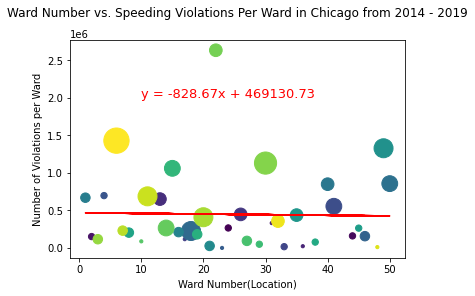

In [42]:
line_to_plot = to_linear_regress(to_plot_df["Ward Number"], to_plot_df["Number of Speeding Violations per Ward"],weight, arrangement, cmap)
plt.xlabel("Ward Number(Location)")
plt.ylabel("Number of Violations per Ward")
plt.title("Ward Number vs. Speeding Violations Per Ward in Chicago from 2014 - 2019",y=1.08)
to_annotate(line_to_plot, 10,2000000)

correlation coefficient : 0.58


Text(0.5, 1.08, 'Number of Red-Light Cameras Per Ward vs.The Number of Speeding Violations in Chicago from 2014 - 2019')

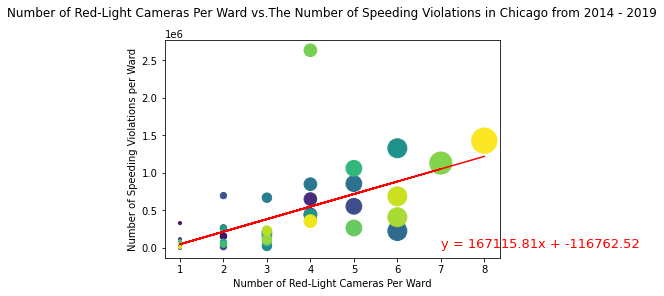

In [43]:
weight= 10 * (to_plot_df["Number of Red-Light Cameras Per Ward"]**2)
arrangement=np.arange(len( to_plot_df["Number of Red-Light Cameras Per Ward"]))
cmap='viridis'
second_line = to_linear_regress(to_plot_df["Number of Red-Light Cameras Per Ward"], to_plot_df["Number of Speeding Violations per Ward"], weight, arrangement, cmap)
to_annotate(second_line,7, 200)
plt.xlabel("Number of Red-Light Cameras Per Ward")
plt.ylabel("Number of Speeding Violations per Ward")
plt.title("Number of Red-Light Cameras Per Ward vs.The Number of Speeding Violations in Chicago from 2014 - 2019", y=1.08)
